In [28]:
##########################################################################################
#                                                                                        #
#  888888b.  8888888 .d88888b.   .d8888b.     .d8888b.   .d8888b.      d8888      d8888  #
#  888  "88b   888  d88P" "Y88b d88P  Y88b   d88P  Y88b d88P  Y88b    d8P888     d8P888  #
#  888  .88P   888  888     888 Y88b.        888        888          d8P 888    d8P 888  #
#  8888888K.   888  888     888  "Y888b.     888d888b.  888d888b.   d8P  888   d8P  888  #
#  888  "Y88b  888  888     888     "Y88b.   888P "Y88b 888P "Y88b d88   888  d88   888  #
#  888    888  888  888     888       "888   888    888 888    888 8888888888 8888888888 #
#  888   d88P  888  Y88b. .d88P Y88b  d88P   Y88b  d88P Y88b  d88P       888        888  #
#  8888888P" 8888888 "Y88888P"   "Y8888P"     "Y8888P"   "Y8888P"        888        888  #
#                                                                                        # 
##########################################################################################


print('Practical Data Wrangling, Final Project Spring 2024')

Practical Data Wrangling, Final Project Spring 2024


In [29]:
print('Decription of HDC- Hospital Discounted Care was created by ​​House Bill (HB) 21-1198​. Patients who are at or below 250% of the Federal Poverty Guidelines (FPG) are eligible for Hospital Discounted Care. It limits the amounts that low-income patients can be billed for health care services at hospitals and emergency rooms, It also limits amounts billed from providers who work at hospitals and emergency rooms. **Hospitals must give patients the chance to apply for discounted care when they have services at the hospital.** If the patient qualifies, their billed amounts will be the limited to the rates set by the Department of Health Care Policy and Financing (Department). Payment plans for patients who qualify cannot be more than four (4) % of the patients gross monthly income for bills from the hospital. Payment plans for each provider that bills separately from the hospital cannot be more than two (2) % of the patients gross monthly household income. Payment plans cannot be longer than 36 months of payments. Once 36 payments have been made, the bill is considered paid in full.')



Decription of HDC- Hospital Discounted Care was created by ​​House Bill (HB) 21-1198​. Patients who are at or below 250% of the Federal Poverty Guidelines (FPG) are eligible for Hospital Discounted Care. It limits the amounts that low-income patients can be billed for health care services at hospitals and emergency rooms, It also limits amounts billed from providers who work at hospitals and emergency rooms. **Hospitals must give patients the chance to apply for discounted care when they have services at the hospital.** If the patient qualifies, their billed amounts will be the limited to the rates set by the Department of Health Care Policy and Financing (Department). Payment plans for patients who qualify cannot be more than four (4) % of the patients gross monthly income for bills from the hospital. Payment plans for each provider that bills separately from the hospital cannot be more than two (2) % of the patients gross monthly household income. Payment plans cannot be longer than 

In [47]:
print('Of the 67/97 participating(or should be participating) Hospitals in Colorado we evaluated each of their websites to ensure they were comlying with the HDC law requirements')

Of the 67/97 participating(or should be participating) Hospitals in Colorado we evaluated each of their websites to ensure they were comlying with the HDC law requirements


In [31]:
#Importing Libraries
import pandas as pd
import pylab as plt
import numpy as np
import datetime as dt
import nltk as nltk
import matplotlib.pyplot as plt 
import re


import os #YouTube video taught me to pull my data with this(I forgot which channel to give credit) 
working_directory = os.getcwd()
print(working_directory)

/Users/AlinaSanchez/BIOS6644_Final_Project


In [32]:
# Read the CSV file into a DataFrame
# Bad Example for Class demo
bad_data = pd.read_csv("/Users/AlinaSanchez/HDC_Website_Tracker_bad.csv")
print(bad_data)

                        Facility Name Facility ID  Hospital Discounter Care   \
0                 ADVENTHEALTH AVISTA       10316                        NaN   
1            ADVENTHEALTH CASTLE ROCK      01L581                        NaN   
2              ADVENTHEALTH LITTLETON       10456                        NaN   
3                 ADVENTHEALTH PARKER      01J544                        NaN   
4                 ADVENTHEALTH PORTER       10424                        NaN   
..                                ...         ...                        ...   
92           VIBRA HOSPITAL OF DENVER      010427                        NaN   
93  WEISBROD MEMORIAL COUNTY HOSPITAL      010214                        NaN   
94         WEST SPRINGS HOSPITAL, INC      01U328                        NaN   
95   WRAY COMMUNUTY DISTRICT HOSPITAL      010160                        NaN   
96              YUMA DISTRIC HOSPITAL      010127                        NaN   

    HDC on Landing Page  HDC Conspicous

In [33]:
# Transpose the DataFrame suggestion from ChatGPT 3.5
transposed_data = bad_data.T

# Print the transposed DataFrame
print(transposed_data)

print('What the heck')

                                                                                                   0   \
Facility Name                                                                     ADVENTHEALTH AVISTA   
Facility ID                                                                                     10316   
Hospital Discounter Care                                                                          NaN   
HDC on Landing Page                                                                             False   
HDC Conspicous on the landing page                                                              False   
HDC within Menu System on Landing Page                                                          False   
Cannot find HDC on facility website                                                             False   
Link to facility HDC page                                                           CommonSpirit-Link   
Phone number to call to get more info about HDC     Gen

In [34]:
print('This was a bit tougher to wrangle as my CSV was not importing how I wanted to....')

This was a bit tougher to wrangle as my CSV was not importing how I wanted to....


In [35]:
print('This new CSV I did do a bit cleaning directly on the spreadsheet(do not worry, I did not tamper with the Original) to shorten the column titles in hopes that would help')

This new CSV I did do a bit cleaning directly on the spreadsheet(do not worry, I did not tamper with the Original) to shorten the column titles in hopes that would help


In [36]:
#Pull Data 
good_data = pd.read_csv("/Users/AlinaSanchez/ HDC_Website_Tracker_good.csv")
print(good_data)

good_data


                        Facility Name Facility ID  Landing Page  Conspicous  \
0                 ADVENTHEALTH AVISTA       10316         False       False   
1            ADVENTHEALTH CASTLE ROCK      01L581         False       False   
2              ADVENTHEALTH LITTLETON       10456         False       False   
3                 ADVENTHEALTH PARKER      01J544         False       False   
4                 ADVENTHEALTH PORTER       10424         False       False   
..                                ...         ...           ...         ...   
92           VIBRA HOSPITAL OF DENVER      010427         False       False   
93  WEISBROD MEMORIAL COUNTY HOSPITAL      010214         False       False   
94         WEST SPRINGS HOSPITAL, INC      01U328         False       False   
95   WRAY COMMUNUTY DISTRICT HOSPITAL      010160         False       False   
96              YUMA DISTRIC HOSPITAL      010127         False       False   

    Within Menu System  Not Found Link to facility 

,Facility Name,Facility ID,Landing Page,Conspicous,Within Menu System,Not Found,Link to facility HDC page,Phone number to call to get more info about HDC,Contact email for HDC,PR-English,...,Notes:,Application Clear,Sep Fin Policy,Distinction btwn App,Link to hospital's financial assistance policy,Complying w Law,User Ability-Eng),User Ability- Span,Final_Notes,Evalution Completed (date/time)
0,ADVENTHEALTH AVISTA,10316,False,False,False,False,CommonSpirit-Link,Gen Hosp Number(303)673-1000| Customer Service...,NaN,True,...,"Translation of website when clicking the ""Colo...",False,True,Not really- lack of description,Link,3.0,Good,Bad,APPLIES TO ALL ADVENT LOCATIONS: Financial Ass...,1/3/24 at 12pm
1,ADVENTHEALTH CASTLE ROCK,01L581,False,False,False,False,CommonSpirit-Link,Gen Hosp Number(720)455-5000,NaN,True,...,same as above,False,True,Not really- lack of description,Link,3.0,Good,Bad,see above,1/3/24 at 12pm
2,ADVENTHEALTH LITTLETON,10456,False,False,False,False,CommonSpirit- Link,Gen Hosp Number(303)730-8900,NaN,True,...,same as above,False,True,Not really- lack of description,Link,3.0,Good,Bad,see above,1/3/24 at 12pm
3,ADVENTHEALTH PARKER,01J544,False,False,False,False,CommonSpirit- Link,Gen Hosp Numer(303)269-4000,NaN,True,...,same as above,False,True,Not really- lack of description,Link,3.0,Good,Bad,see above,1/3/24 at 12pm
4,ADVENTHEALTH PORTER,10424,False,False,False,True,CommonSpirit- Link,Gen Hosp Numer(303)778-1955,NaN,True,...,same as above,False,True,Not really- lack of description,Link,3.0,Good,Bad,see above,1/3/24 at 12pm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,VIBRA HOSPITAL OF DENVER,010427,False,False,False,True,NaN,NaN,NaN,False,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,"Critical Care hospital, unable to locate the H...",04/26/2024 at 12:05am
93,WEISBROD MEMORIAL COUNTY HOSPITAL,010214,False,False,False,True,NaN,NaN,NaN,False,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,Unable to locate hospital website,04/26/2024 at 12:13am
94,"WEST SPRINGS HOSPITAL, INC",01U328,False,False,False,True,NaN,NaN,NaN,False,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,Not able to locate the HDC on the website.,04/26/2024 at 12:19am
95,WRAY COMMUNUTY DISTRICT HOSPITAL,010160,False,False,False,True,NaN,NaN,NaN,False,...,NaN,False,False,NaN,NaN,NaN,NaN,NaN,Not able to locate the HDC on the website.,04/26/2024 at 12:25am


In [37]:
#Drop columns by specifying their names
columns_to_drop = ['Link to facility HDC page','Phone number to call to get more info about HDC', 'Contact email for HDC', 'Notes:','Evalution Completed (date/time)']
good_data.drop(columns=columns_to_drop,inplace=True)

#Printing New Data Frame
print(good_data)

good_data

#Food for thought- make sure column names are not long or use an underscore _ for spaces

                        Facility Name Facility ID  Landing Page  Conspicous  \
0                 ADVENTHEALTH AVISTA       10316         False       False   
1            ADVENTHEALTH CASTLE ROCK      01L581         False       False   
2              ADVENTHEALTH LITTLETON       10456         False       False   
3                 ADVENTHEALTH PARKER      01J544         False       False   
4                 ADVENTHEALTH PORTER       10424         False       False   
..                                ...         ...           ...         ...   
92           VIBRA HOSPITAL OF DENVER      010427         False       False   
93  WEISBROD MEMORIAL COUNTY HOSPITAL      010214         False       False   
94         WEST SPRINGS HOSPITAL, INC      01U328         False       False   
95   WRAY COMMUNUTY DISTRICT HOSPITAL      010160         False       False   
96              YUMA DISTRIC HOSPITAL      010127         False       False   

    Within Menu System  Not Found  PR-English  PR-S

,Facility Name,Facility ID,Landing Page,Conspicous,Within Menu System,Not Found,PR-English,PR-Spanish,Uniform App-English,UA Unalt-Spanish,...,UA Alt-Spanish,Navi in Spanish,Application Clear,Sep Fin Policy,Distinction btwn App,Link to hospital's financial assistance policy,Complying w Law,User Ability-Eng),User Ability- Span,Final_Notes
0,ADVENTHEALTH AVISTA,10316,False,False,False,False,True,True,True,False,...,False,False,False,True,Not really- lack of description,Link,3.0,Good,Bad,APPLIES TO ALL ADVENT LOCATIONS: Financial Ass...
1,ADVENTHEALTH CASTLE ROCK,01L581,False,False,False,False,True,True,True,False,...,False,False,False,True,Not really- lack of description,Link,3.0,Good,Bad,see above
2,ADVENTHEALTH LITTLETON,10456,False,False,False,False,True,True,True,False,...,False,False,False,True,Not really- lack of description,Link,3.0,Good,Bad,see above
3,ADVENTHEALTH PARKER,01J544,False,False,False,False,True,True,True,False,...,False,False,False,True,Not really- lack of description,Link,3.0,Good,Bad,see above
4,ADVENTHEALTH PORTER,10424,False,False,False,True,True,True,True,False,...,False,False,False,True,Not really- lack of description,Link,3.0,Good,Bad,see above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,VIBRA HOSPITAL OF DENVER,010427,False,False,False,True,False,False,False,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,"Critical Care hospital, unable to locate the H..."
93,WEISBROD MEMORIAL COUNTY HOSPITAL,010214,False,False,False,True,False,False,False,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,Unable to locate hospital website
94,"WEST SPRINGS HOSPITAL, INC",01U328,False,False,False,True,False,False,False,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,Not able to locate the HDC on the website.
95,WRAY COMMUNUTY DISTRICT HOSPITAL,010160,False,False,False,True,False,False,False,False,...,False,False,False,False,NaN,NaN,NaN,NaN,NaN,Not able to locate the HDC on the website.


In [48]:
#Frequencies for column, HDC Not Found on the respective hospital's website


not_found_counts = good_data['Not Found'].value_counts()

#Remove NaN values during count
good_data.dropna(inplace=True)

#Print the frequencies
print(not_found_counts)

#Food for Thought- change the values into presentable values(True or False can be misleading)

Not Found
False    66
True      1
Name: count, dtype: int64


In [39]:
#Good to see only 1 hospital did not have HDC information on their website. 

In [40]:
#Reviewing all columns that hopsitals are expected to comply with the "law"

#1). Column- Conspicous
# Remove NaN values before counting
good_data.dropna(subset=['Conspicous'], inplace=True)
Conspicous_counts = good_data['Conspicous'].value_counts()

#2). Column- PR-English(Patient's Rights in English)
# Remove NaN values before counting
good_data.dropna(subset=['PR-English'], inplace=True)
PR_English_counts = good_data['PR-English'].value_counts()

#3). Column - PR-Spanish(Patient's Rights in Spanish)
# Remove NaN values before counting
good_data.dropna(subset=['PR-Spanish'], inplace=True)
PR_Spanish_counts = good_data['PR-Spanish'].value_counts()

#4). Column- Uniform App-English
# Remove NaN values before counting
good_data.dropna(subset=['Uniform App-English'], inplace=True)
Uniform_App_English_counts = good_data['Uniform App-English'].value_counts()

#Print the counts
print(Conspicous_counts,PR_English_counts,PR_Spanish_counts,Uniform_App_English_counts)

Conspicous
False    62
True      5
Name: count, dtype: int64 PR-English
True     57
False    10
Name: count, dtype: int64 PR-Spanish
True     54
False    13
Name: count, dtype: int64 Uniform App-English
True     54
False    13
Name: count, dtype: int64


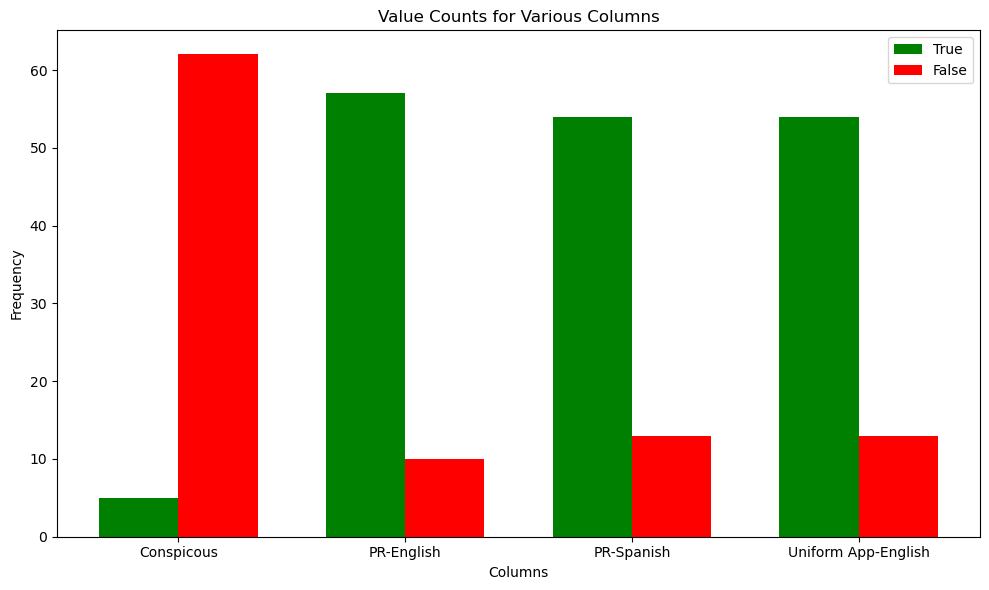

In [41]:
#The bar graphs I was creating alone were not very presentable, so I did utilize Chat GPT 3.5 for some guidance on my codes


#Define the data
columns = ['Conspicous', 'PR-English', 'PR-Spanish', 'Uniform App-English']
true_counts = [5, 57, 54, 54]
false_counts = [62, 10, 13, 13]

#Set up bar graph parameters
bar_width = 0.35
index = np.arange(len(columns))
colors = ['Green', 'Red']  # Green for True, Red for False

#Plot bar graph
plt.figure(figsize=(10, 6))
plt.bar(index, true_counts, bar_width, label='True', color=colors[0])
plt.bar(index + bar_width, false_counts, bar_width, label='False', color=colors[1])

#Add labels and legend
plt.xlabel('Columns')
plt.ylabel('Frequency')
plt.title('Value Counts for Various Columns')
plt.xticks(index + bar_width / 2, columns)
plt.legend()

#Show plot
plt.tight_layout()
plt.show()

In [49]:
#Frequencies for column, Complying with Law

com_law_counts = good_data['Complying w Law'].value_counts()

#Remove NaN values during count
good_data.dropna(inplace=True)

# Print the frequencies
print(com_law_counts)

Complying w Law
3.0    48
2.0     8
1.0     7
0.0     3
4.0     1
Name: count, dtype: int64


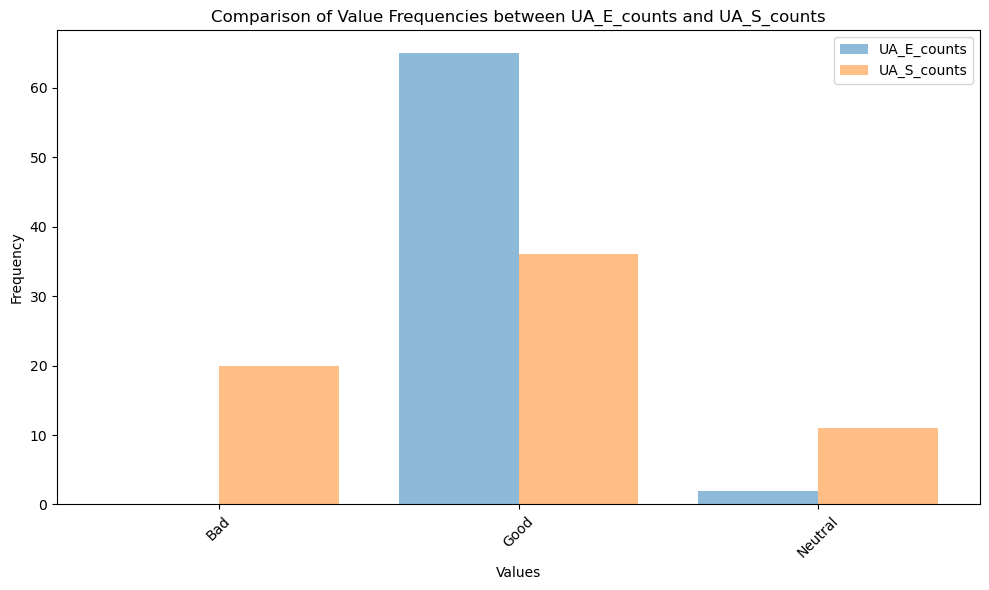

In [43]:
#Make a Comparison between the English User Usability(UA_E_counts) and the Spanish Usability(UA_S_counts)
#Previous Code kept creping out, did have Chat GPT 3.5 revise and make suggestions

#Calculate value counts for both columns
UA_E_counts = good_data['User Ability-Eng)'].value_counts()
UA_S_counts = good_data['User Ability- Span'].value_counts()

#Get unique values for both columns
unique_values = sorted(set(UA_E_counts.index) | set(UA_S_counts.index))

#Define the width of each bar
bar_width = 0.4

#Define the position of each bar group
index = np.arange(len(unique_values))

#Plot the frequencies of both columns on a bar chart
plt.figure(figsize=(10, 6))

#Plot for UA_E_counts
plt.bar(index - bar_width/2, [UA_E_counts.get(val, 0) for val in unique_values], bar_width, alpha=0.5, label='UA_E_counts')

#Plot for UA_S_counts
plt.bar(index + bar_width/2, [UA_S_counts.get(val, 0) for val in unique_values], bar_width, alpha=0.5, label='UA_S_counts')

#Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Comparison of Value Frequencies between UA_E_counts and UA_S_counts')
plt.xticks(index, unique_values)
plt.legend()

#Show plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [44]:
#Seeing these results how the user ability for a person who solely speaks Spanish to navigate this website in order to locate the HDC did dissapointment me. 

In [45]:
#Regular Expressions for Note Column

#Df for Regular Expression
Reg_Ex_Notes = {'Final_Notes': ['translate to various languages', 'translation in different languages', 'translate to multiple languages']}
df = pd.DataFrame(good_data)

#Definining
pattern = r'\btranslate\b|\blanguages\b'

#Searhcing rows with the pattern
matches = df['Final_Notes'].str.contains(pattern, case=False, regex=True)

#Filtering the df to show rows 
matched_rows = df[matches]

print(matched_rows)

matched_rows

                                        Facility Name Facility ID  \
0                                 ADVENTHEALTH AVISTA       10316   
13  COMMONSPIRIT - LONGMONT UNITED HOSPITAL(former...      010350   
14                            CENTURA MERCY HOPSITAL       011213   
15                           CENTURA PENROSE HOSPITAL      010543   
16                        CENTURA ST ANTHONY HOPSITAL      010429   
17                  CENTURA ST ANTHONY NORTH HOSPITAL      010402   
18                 CENTURA ST ANTHONY SUMMIT HOSPITAL      01l155   
19                      CENTURA ST ELIZABETH HOSPITAL      010130   
20                        CENTURA ST FRANCIS HOPSITAL      01H523   
21                    CENTURA ST MARY-CORWIN HOSPITAL      010650   
22                    CENTURA ST THOMAS MORE HOSPITAL      010650   
33                                 FOOTHILLS HOSPITAL      010323   
35                         GRAND RIVER MEDICAL CENTER      010830   
36                           GUNNI

,Facility Name,Facility ID,Landing Page,Conspicous,Within Menu System,Not Found,PR-English,PR-Spanish,Uniform App-English,UA Unalt-Spanish,...,UA Alt-Spanish,Navi in Spanish,Application Clear,Sep Fin Policy,Distinction btwn App,Link to hospital's financial assistance policy,Complying w Law,User Ability-Eng),User Ability- Span,Final_Notes
0,ADVENTHEALTH AVISTA,10316,False,False,False,False,True,True,True,False,...,False,False,False,True,Not really- lack of description,Link,3.0,Good,Bad,APPLIES TO ALL ADVENT LOCATIONS: Financial Ass...
13,COMMONSPIRIT - LONGMONT UNITED HOSPITAL(former...,010350,False,False,False,False,True,True,True,False,...,False,False,True,True,The website titled the different documents and...,Link,3.0,Good,Good,"HDC is not on landing page, but able to naviga..."
14,CENTURA MERCY HOPSITAL,011213,False,False,False,False,True,True,True,False,...,False,True,True,True,The website titled the different documents and...,Link,3.0,Good,Good,"HDC is not on landing page, but able to naviga..."
15,CENTURA PENROSE HOSPITAL,010543,False,False,False,False,True,True,True,False,...,False,True,True,True,The website titled the different documents and...,Link,3.0,Good,Good,"HDC is not on landing page, but able to naviga..."
16,CENTURA ST ANTHONY HOPSITAL,010429,False,False,False,False,True,True,True,False,...,False,True,True,True,The website titled the different documents and...,Link,3.0,Good,Good,"HDC is not on landing page, but able to naviga..."
17,CENTURA ST ANTHONY NORTH HOSPITAL,010402,False,False,False,False,True,True,True,False,...,False,True,True,True,The website titled the different documents and...,Link,3.0,Good,Good,"HDC is not on landing page, but able to naviga..."
18,CENTURA ST ANTHONY SUMMIT HOSPITAL,01l155,False,False,False,False,True,True,True,False,...,False,True,True,True,The website titled the different documents and...,Link,3.0,Good,Good,"HDC is not on landing page, but able to naviga..."
19,CENTURA ST ELIZABETH HOSPITAL,010130,False,False,False,False,True,True,True,False,...,False,True,True,True,The website titled the different documents and...,Link,3.0,Good,Good,"HDC is not on landing page, but able to naviga..."
20,CENTURA ST FRANCIS HOPSITAL,01H523,False,False,False,False,True,True,True,False,...,False,True,True,True,The website titled the different documents and...,Link,3.0,Good,Good,"HDC is not on landing page, but able to naviga..."
21,CENTURA ST MARY-CORWIN HOSPITAL,010650,False,False,False,False,True,True,True,False,...,False,True,True,True,The website titled the different documents and...,Link,3.0,Good,Good,"HDC is not on landing page, but able to naviga..."


In [ ]:
#Future Consideration: Create a "search bar" to look up a hospital and review their results.


In [ ]:
#Future Consideration: Compare another state with a similar House Bill and assess their hospitals website for additional Data Wrangling Practice. 

In [ ]:
#Biggest Lessons
#1.) Making sure column names are short and concise- along with no apostrophes 
#2.) Replacing the True and False with Yes and No or other variable(On the Google Doc, I would check a box)
#3.) I could have somehow compared another data set with a similar law in a different state to compare with Colorado
#4.) How do demonstrate Regular Expression for analysis purposes